In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/content/placement (1).csv')

In [3]:
df

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57
...,...,...
195,6.93,2.46
196,5.89,2.57
197,7.21,3.24
198,7.63,3.96


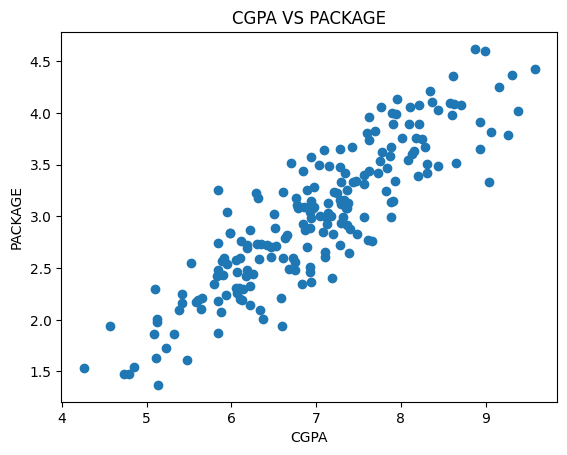

In [5]:
plt.scatter(df['cgpa'] , df['package'])
plt.xlabel('CGPA')
plt.ylabel('PACKAGE')
plt.title('CGPA VS PACKAGE')
plt.show()

In [6]:
X = df.iloc[:,0:1]
y = df.iloc[:,-1]

In [7]:
X

,cgpa
0,6.89
1,5.12
2,7.82
3,7.42
4,6.94
...,...
195,6.93
196,5.89
197,7.21
198,7.63


In [8]:
y

,package
0,3.26
1,1.98
2,3.25
3,3.67
4,3.57
...,...
195,2.46
196,2.57
197,3.24
198,3.96


In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [10]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [11]:
lr.fit(X_train , y_train)

LinearRegression()

In [12]:
y_pred = lr.predict(X_test)

In [13]:
from sklearn.metrics import *
r2_score(y_test,y_pred)

0.780730147510384

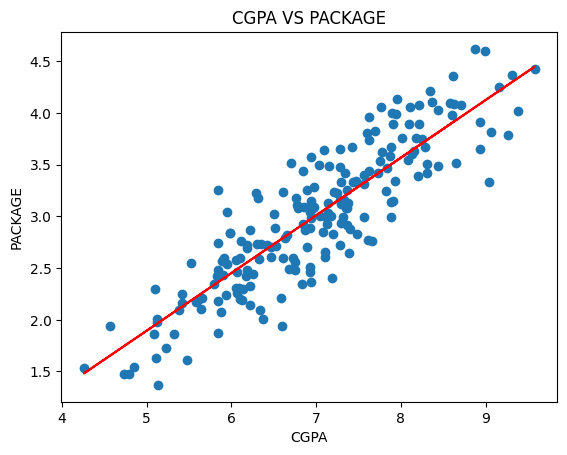

In [14]:
plt.scatter(df['cgpa'] , df['package'])
plt.plot(X_train , lr.predict(X_train) , color='red')
plt.xlabel('CGPA')
plt.ylabel('PACKAGE')
plt.title('CGPA VS PACKAGE')
plt.show()

In [15]:
m = lr.coef_[0]
c = lr.intercept_

In [17]:
# y = mx + c

m * 8.58 + c

np.float64(3.891116009744203)

In [18]:
lr.predict(X_test.iloc[0].values.reshape(1 , 1))

array([3.89111601])

In [19]:
class ManualLR :

    def __init__(self):
        self.m = None
        self.c = None

    def fit(self,X_train,y_train):
      num = 0
      den = 0

      for i in range(X_train.shape[0]):
        num = num + ((X_train[i] - X_train.mean()) * (y_train[i] - y_train.mean()))
        den = den + ((X_train[i] - X_train.mean()) * (X_train[i] - X_train.mean()))

      self.m = num/den
      self.c = y_train.mean() - (self.m * X_train.mean())
      print(self.m)
      print(self.c)

    def predict(self,X_test):
      print(X_test)
      return self.m * X_test + self.c


In [21]:

df = pd.read_csv('/content/placement (1).csv')

In [22]:

X = df.iloc[:,0].values
y = df.iloc[:,1].values

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [24]:

lr = ManualLR()

In [25]:
lr.fit(X_train,y_train)

0.5579519734250721
-0.8961119222429152


In [26]:
X_train.shape[0]

160

In [27]:

X_train[0]

np.float64(7.14)

In [28]:

X_train.mean()

np.float64(6.989937500000001)

In [29]:

X_test[0]

np.float64(8.58)

In [30]:
print(lr.predict(X_test[0]))

8.58
3.891116009744203
